In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 
def hist(x, num_bins):
    n, bin_edges = np.histogram(x, bins=num_bins)
    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
    # print(n.sum()*(bin_edges[1]-bin_edges[0]))
    # plt.plot(bins_center,n,'-',markersize=2,label=label)
    return bins_center, n

(20000,)
(20000,)
(19989,)
(19998,)


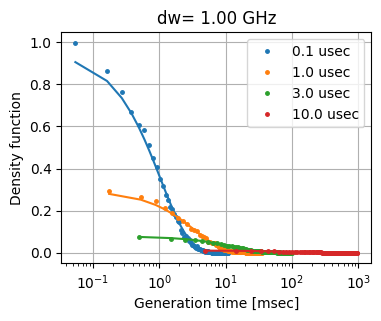

(20000,)
(20000,)
(20000,)
(19361,)


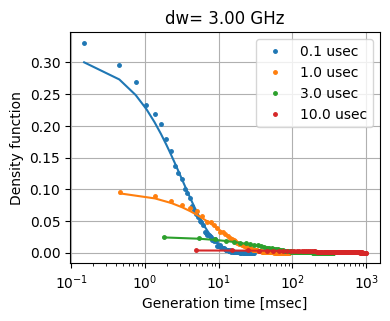

(19999,)
(20000,)
(19991,)
(20000,)


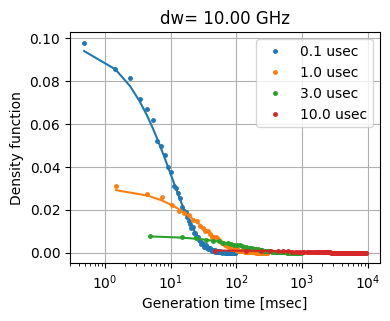

In [13]:

linewidth_list = np.array([1,3,10])*1e9 # photon linewidth in GHz
reset_time_list = np.array([0.1,1,3,10])*1e-6
# reset_time_list = np.array([0.1,1])*1e-6
# reset_time_list = np.array([3,10])*1e-6
Nrep = 20 # No. of repetitions

prob_param = np.zeros((len(linewidth_list),len(reset_time_list)))
for i_l, dw in enumerate(linewidth_list):
    plt.figure(figsize=(4,3))
    for i_reset, reset_time in enumerate(reset_time_list):
        succ_time = []
        for i_rep in range(Nrep):

            fname = f"results/dist/lw_{dw/1e9:.2f}_qres_{reset_time*1e6:.1f}_r_{i_rep}.npz"
            f1 = np.load(fname)
            gen_rate = f1['arr_0'] 
            total_time = f1['arr_1'] 
            succ_time += f1['arr_2'].tolist()

        succ_time = np.array(succ_time)
        print(succ_time.shape)
        bins, pdf = hist(succ_time*1e3, 100)
        plt.plot(bins,pdf,'.',markersize=5, color = f"C{i_reset}",label=f"{reset_time*1e6:.1f} usec")
        # print(bins[0] )
        i_fit = np.argwhere(pdf>0)[:,0]
        pdf_fit = pdf[i_fit]
        bins_fit = bins[i_fit]
        # coefs = np.polyfit(bins_fit, np.log(pdf_fit), 1)
        # print(coefs[0],np.exp(coefs[1]))
        # plt.plot(bins,np.exp(coefs[1]+coefs[0]*bins),"k--")#, color=f"C{i_l}")
        f = lambda x, a: np.log(a)-a*x
        coef = optimize.curve_fit(f, bins_fit, np.log(pdf_fit))
        # print(coef[0])
        plt.plot(bins,coef[0]*np.exp(-coef[0]*bins),"-", color = f"C{i_reset}")#, color=f"C{i_l}")
        prob_param[i_l, i_reset] = coef[0].item()
    # alpha = 0.33
    # plt.plot(bins,-alpha*np.log((bins)*alpha))
    plt.xlabel("Generation time [msec]")
    plt.xscale("log")
    # plt.yscale("log")
    plt.ylabel("Density function")
    plt.grid()
    # plt.ylim([1e-4,2e0])
    plt.legend()
    plt.title(f"dw= {dw/1e9:.2f} GHz")
    plt.show()

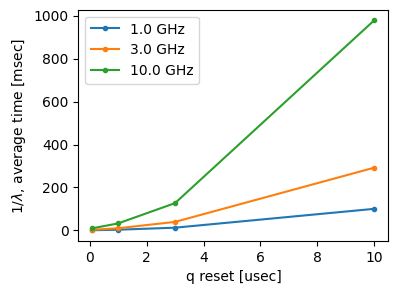

In [19]:
plt.figure(figsize=(4,3))
for i_l, dw in enumerate(linewidth_list):
    plt.plot(reset_time_list*1e6,1/prob_param[i_l,:],".-",label=f"{dw/1e9} GHz")
plt.legend()
plt.xlabel("q reset [usec]")
plt.ylabel(r"$1/\lambda$, average time [msec]")
plt.show()


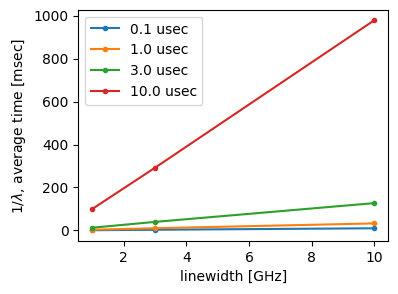

In [20]:
plt.figure(figsize=(4,3))
for i_reset, reset_time in enumerate(reset_time_list):
    plt.plot(linewidth_list/1e9,1/prob_param[:,i_reset],".-",label=f"{reset_time*1e6:.1f} usec")
plt.legend()
plt.xlabel("linewidth [GHz]")
plt.ylabel(r"$1/\lambda$, average time [msec]")
plt.show()


In [30]:
print(pdf[-10:-1])

[0.00000000e+00 1.68857906e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
